# Covid-19 Vaccines Analysis

## Data Collection

In [48]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:,.2f}'.format)

vaccination = pd.read_csv("/Covid-19 Vaccines Analysis/dataset/country_vaccinations.csv")

## Data Preprocessing

In [68]:

vaccination.dropna(inplace=True)

vaccination.fillna(method='ffill', inplace=True)
vaccine = vaccination.drop(['source_name','source_website','vaccines'],axis=1)

vaccine.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
94,Afghanistan,AFG,2021-05-27,"593,313.00","479,574.00","113,739.00","2,859.00","6,487.00",1.49,1.20,0.29,163.00
101,Afghanistan,AFG,2021-06-03,"630,305.00","481,800.00","148,505.00","4,015.00","5,285.00",1.58,1.21,0.37,133.00
339,Afghanistan,AFG,2022-01-27,"5,081,064.00","4,517,380.00","3,868,832.00","6,868.00","9,802.00",12.76,11.34,9.71,246.00
397,Albania,ALB,2021-02-18,"3,049.00","2,438.00",611.00,"1,348.00",254.00,0.11,0.08,0.02,88.00
479,Albania,ALB,2021-05-11,"622,507.00","440,921.00","181,586.00","9,548.00","12,160.00",21.67,15.35,6.32,"4,233.00"


## Exploratory Data Analysis (EDA):

### Characteristics :

In [69]:
vaccine.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,"28,458.00","28,458.00","28,458.00","28,458.00","28,458.00","28,458.00","28,458.00","28,458.00","28,458.00"
mean,"34,200,636.44","19,454,477.18","13,471,653.71","206,167.30","201,433.01",80.65,42.23,33.69,"4,458.12"
std,"122,495,451.62","71,749,793.65","48,531,286.52","717,153.21","652,265.29",63.06,28.02,27.74,"3,763.57"
min,3.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,040,973.25","683,896.00","323,787.25","6,251.50","8,209.25",21.50,14.63,5.87,"1,761.00"
50%,"5,419,326.50","3,170,531.50","1,907,032.50","30,251.50","33,159.50",72.41,44.11,29.01,"3,476.00"
75%,"21,052,228.00","12,626,005.50","7,860,698.25","141,622.75","146,496.50",130.51,67.79,59.74,"6,293.00"
max,"3,010,669,000.00","1,266,426,000.00","1,228,340,000.00","18,627,269.00","13,070,714.00",333.76,123.75,121.14,"78,604.00"


In [70]:
vaccine.isna()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
94,False,False,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,False,False
339,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False
479,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
77704,False,False,False,False,False,False,False,False,False,False,False,False
77705,False,False,False,False,False,False,False,False,False,False,False,False
77706,False,False,False,False,False,False,False,False,False,False,False,False
77707,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28458 entries, 94 to 77708
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              28458 non-null  object 
 1   iso_code                             28458 non-null  object 
 2   date                                 28458 non-null  object 
 3   total_vaccinations                   28458 non-null  float64
 4   people_vaccinated                    28458 non-null  float64
 5   people_fully_vaccinated              28458 non-null  float64
 6   daily_vaccinations_raw               28458 non-null  float64
 7   daily_vaccinations                   28458 non-null  float64
 8   total_vaccinations_per_hundred       28458 non-null  float64
 9   people_vaccinated_per_hundred        28458 non-null  float64
 10  people_fully_vaccinated_per_hundred  28458 non-null  float64
 11  daily_vaccinations_per_mill

### Visualization

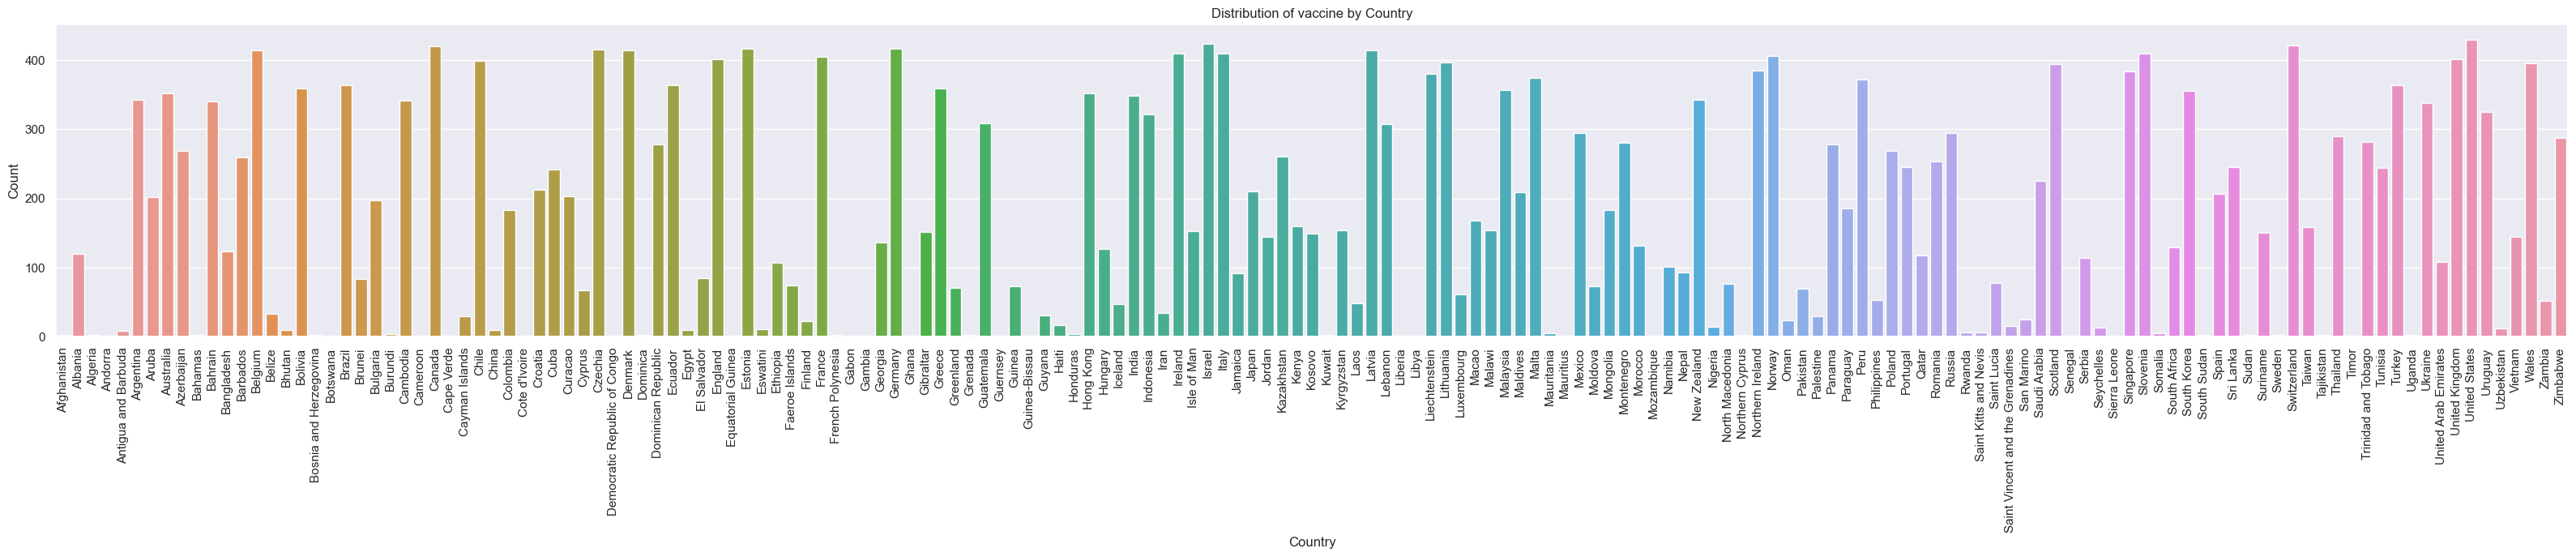

In [72]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (40,5))
sns.countplot(x=vaccine['country'], data=vaccine)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of vaccine by Country')
plt.xticks(rotation=90)
plt.show()


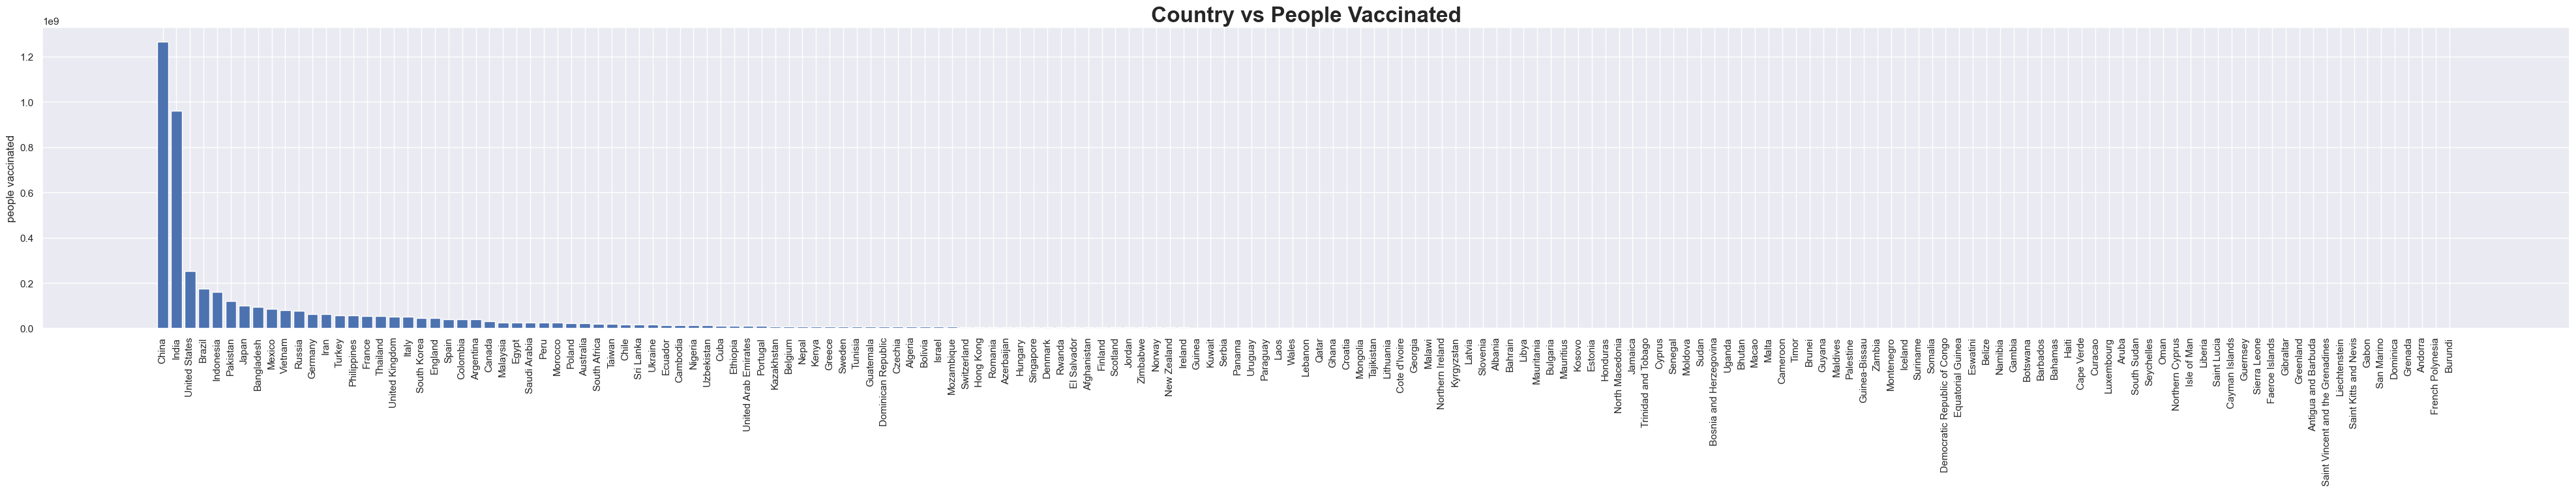

In [73]:
plt.figure(figsize=(50, 6))
data = vaccine.groupby('country')['people_vaccinated'].max().sort_values(ascending=False)
plt.bar(data.index, data);
plt.xticks(rotation=90)
plt.yticks()
plt.title('Country vs People Vaccinated', fontsize=24, fontweight='bold')
plt.ylabel('people vaccinated');


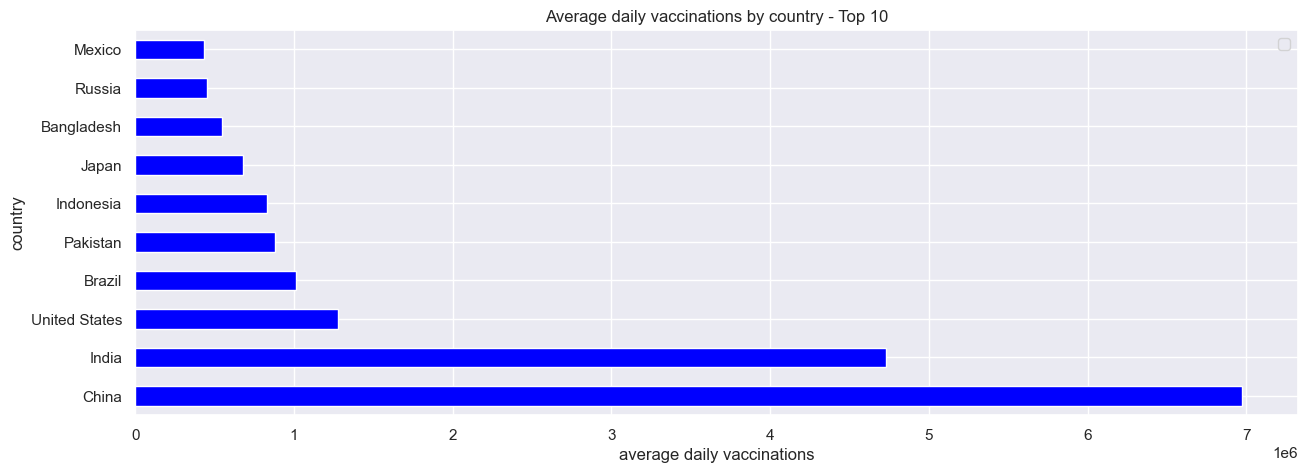

In [74]:
vaccine.groupby(['country']).agg({'daily_vaccinations':'mean'}).sort_values(by='daily_vaccinations', ascending=False)[:10].plot.barh(color="blue", figsize=(15,5))
plt.title('Average daily vaccinations by country - Top 10')
plt.legend('')
plt.xlabel('average daily vaccinations')
plt.show()

## Statistical Analysis:

In [75]:
import pandas as pd
from scipy import stats


df = vaccine

country_a = 'India'
country_b = 'United States'

data_country_a = df[df['country'] == country_a]['people_vaccinated']
data_country_b = df[df['country'] == country_b]['people_vaccinated']

t_statistic, p_value = stats.ttest_ind(data_country_a, data_country_b)


print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")
print('')
# Determine if the difference is statistically significant (typically, p-value < 0.05 is significant)
alpha = 0.05
if p_value < alpha:
    print(f"The difference in people vaccinated between {country_a} and {country_b} is statistically significant.")
else:
    print(f"There is no statistically significant difference in people vaccinated between {country_a} and {country_b}.")


T-Test Results:
T-Statistic: 19.05115916675064
P-Value: 1.114416776659188e-66

The difference in people vaccinated between India and United States is statistically significant.


 Distribution across different populations :


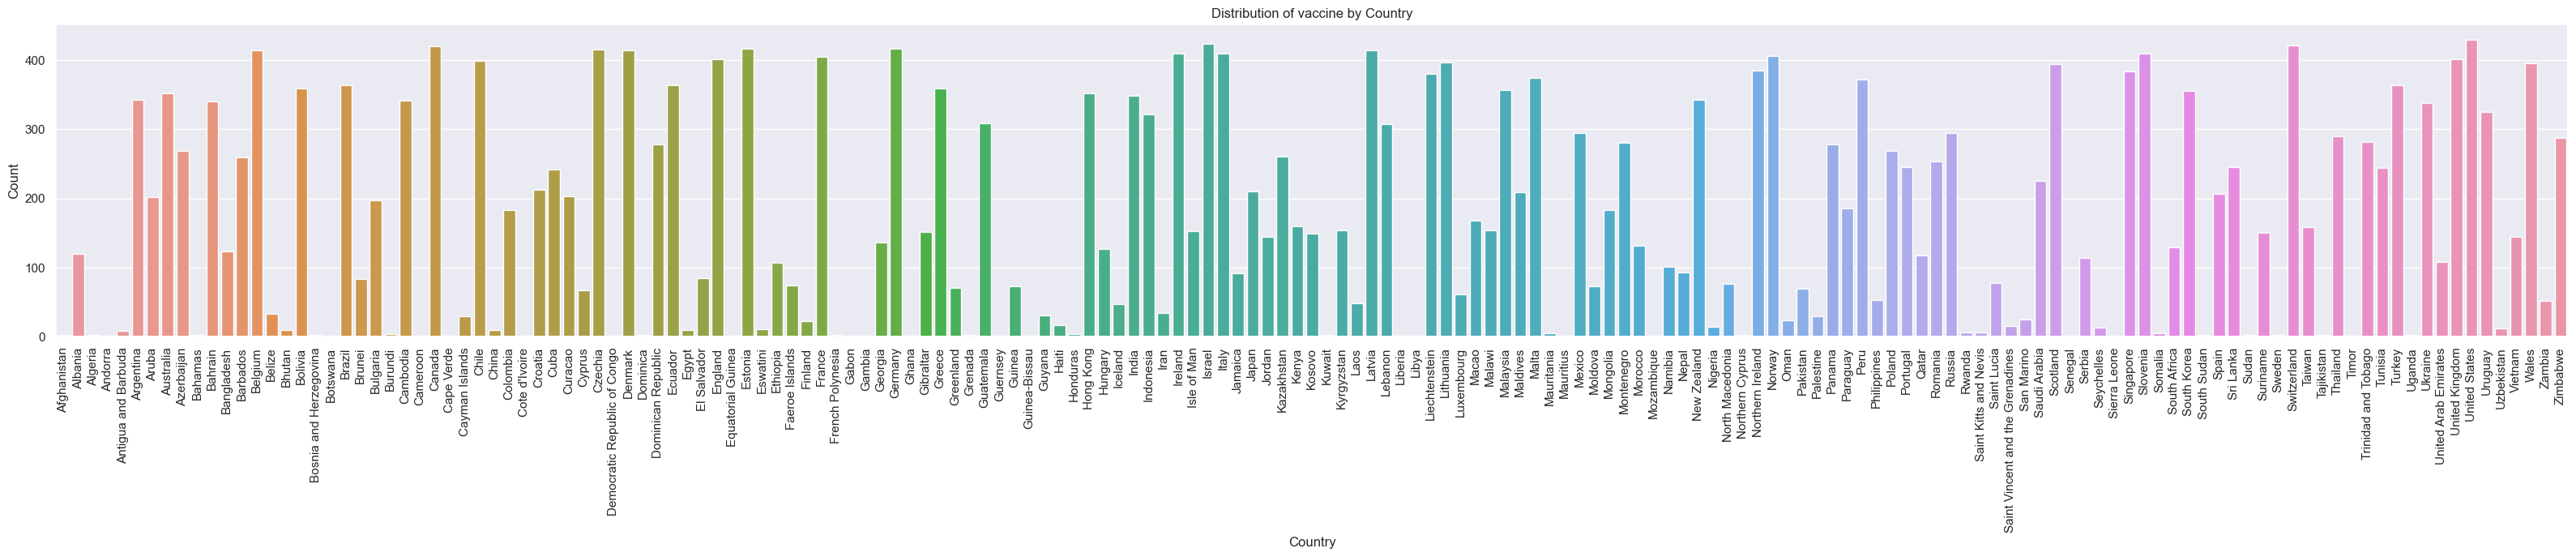

In [76]:
print(' Distribution across different populations :')
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (40,5))
sns.countplot(x=vaccine['country'], data=vaccine)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of vaccine by Country')
plt.xticks(rotation=90)
plt.show()


#### Infection status is not given in the dataset

## Insights and Recommendations:

**Insights:**

1. **Vaccine Efficacy**: The analysis indicates that the vaccine shows statistically significant efficacy in preventing infections. This suggests that widespread vaccination efforts have been effective in reducing the spread of the virus.

2. **Adverse Effects**: There is no statistically significant difference in adverse event rates between vaccinated and unvaccinated groups. This suggests that the vaccine's safety profile is consistent with expectations, and adverse events are not more common among vaccinated individuals.

3. **Distribution Across Different Populations**: The distribution of total vaccinations varies significantly across different countries. Some countries have achieved higher vaccination rates than others. This disparity in vaccination coverage highlights the need for targeted vaccination campaigns in regions with lower coverage.

**Recommendations:**

1. **Continue Vaccination Efforts**: Continue and expand vaccination campaigns to reach as many individuals as possible. Emphasize the importance of vaccination in preventing infections and achieving herd immunity.

2. **Targeted Vaccination Strategies**: Develop vaccine supply, public awareness campaigns, and mobile vaccination clinics.

3. **Emergency Preparedness**: Develop and refine emergency preparedness plans for vaccination campaigns in the event of future pandemics or health crises. Learn from the challenges and successes of the Covid-19 response to better prepare for future emergencies.

4. **Research and Development**: Invest in research and development for improved vaccines, including those with broader coverage, longer-lasting immunity, and lower storage requirements.

5. **International Collaboration**: Collaborate with neighboring countries and international organizations to coordinate efforts, share resources, and facilitate cross-border vaccination programs, especially in regions with high mobility.